In [5]:
# import caiman as cm
import numpy as np
import matplotlib.pyplot as plt
import h5py
from glob import glob
import pandas as pd
from scipy.stats.mstats import zscore
import json

if sys.platform == 'darwin':
    path = '/Volumes/GoogleDrive/My Drive/Code/caiman_online'
else:
    path = 'G:/My Drive/Code/caiman_online/'
sys.path.append(path)


from caiman_analysis import make_trialwise
from caiman_analysis import load_and_parse_json
from caiman_analysis import find_com

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# params
h5_path = glob(path + '/data/*final.hdf5')[0]
json_path = glob(path + '/data/*.json')[-1]

In [13]:
# ONLINE ANALYSIS VIA JSON
data = load_and_parse_json(json_path)
data.keys()

dict_keys(['dff', 'C', 'splits', 'centers'])

In [15]:
dff = np.array(data['dff'])
C = np.array(data['C'])
splits = np.array(data['splits'])
centers = np.array(data['centers'])

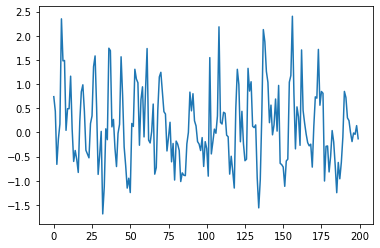

In [17]:
plt.plot(dff[9,0:200])

In [ ]:
# make the data trialwise
traces = make_trialwise(C, splits)

In [3]:
data_path = glob('C:/caiman tests/stimtest/out/*final.hdf5')[-1] # always load the most recent one
# traces = oa.load_data(data_path)
data_path

IndexError: list index out of range

In [4]:
# obj = oa.load_as_obj(data_path)

In [5]:
# obj.estimates.detrend_df_f()

In [13]:
dff = obj.estimates.F_dff
splits = [150, 251, 352, 455, 556, 658, 759, 862, 963, 1065, 1167, 1268, 1370, 1472, 1574, 1675, 1777, 1878, 2028]

In [14]:
dff_trial = oa.make_trialwise(dff, splits)

In [21]:
dff_trial.shape

(19, 336, 101)

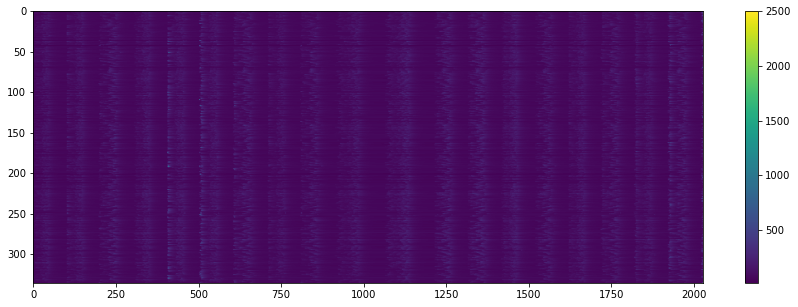

In [10]:
traces = obj.estimates.C
traces_trial = oa.make_trialwise(traces, splits)
plt.figure(figsize=(15,5))
plt.imshow(traces, aspect='auto')
plt.colorbar()

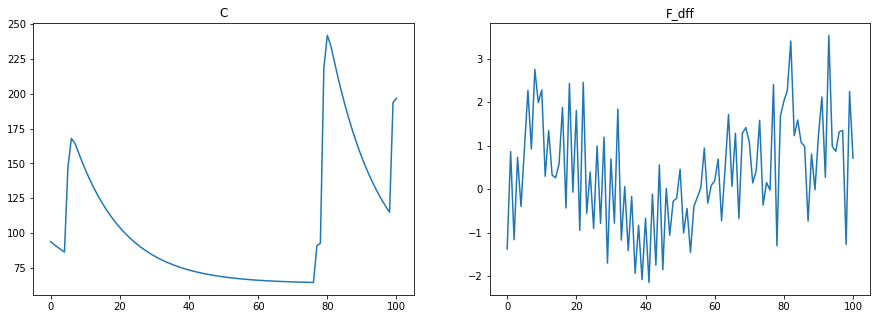

In [23]:
s = [2, 1, slice(None)]
_, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(traces_trial[s])
ax[0].set_title('C')
ax[1].plot(dff_trial[s])
ax[1].set_title('F_dff')
plt.show()

In [24]:
obj.estimates.